## <div style="color:white;display:fill;border-radius:5px;background-color:#e9c46a;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:180%">Hackday 5</p></div>

# Esposa do Kuririm

**Public Score:** 0.94800 (First Place Solution)<br>
**Private Score:** 0.95127 (First Place Solution)

**Membros:** 
- Alysson Machado, 
- Henrique Hashimoto
- Yago Dutra
- Jonata Rocha
- Vanderson A.

**Parte 1:** Competição do Kaggle<br>
**Parte 2:** Apresentação da solução para a bancada avaliadora ( equipe de negócios e equipe técnica)

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Resumo</p></div>

# Problema de Negócio

*"...O time de produtos tem dificuldade em determinar a necessidade da maioria dos clientes. O time de marketing enfrenta desafios para determinar o cliente ideal e o time de desenvolvimento sofre com os grandes volumes de acessos no site e em seu aplicativo, causando quedas de sistema e tornando o site inoperante por algumas horas, impedindo as pessoas de comprar e assim, gerando muitas reclamações no atendimento, liderado pelo time de customer experience."*

"... Porém, a dificuldade inicial era identificar quais clientes teriam um nível de satisfação “Satisfeito” ou “Neutro/Insatisfeito”, para que o time conseguisse entrar em contato somente com os clientes “Neutro/Insatisfeito”.


# Objetivo

- Identificar os clientes satisfeitos/insatisfeitos dentro do escopo de atuação de um cientista de dados
- Gerar insights através dos dados para os times impactados

### Como o Cientista de Dados pode ajudar na resolução

- O Cientista de Dados através do conhecimento do negócio, analises estatisticas, aplicação do metodo cientifico na modelagem dos experimento e na cosntrução de modelos de aprendizado de máquina é um profissional que consegue reunir as informações relevantes sobre os clientes e identificar padrões, tendências e possíveis relações entre as variáveis.


### Como a solução proposta impacta o negocio

- <u>Melhoria da satisfação do cliente:</u> Ao identificar os clientes insatisfeitos ou neutros, o time de atendimento poderá entrar em contato com eles de forma personalizada para entender suas preocupações e buscar soluções. Isso pode levar a um aumento da satisfação do cliente, reduzindo as reclamações e melhorando a imagem da empresa.

- <u>Aumento da retenção de clientes:</u> Com o modelo de satisfação, a empresa pode tomar medidas proativas para resolver os problemas dos clientes insatisfeitos antes que eles se tornem um problema maior e optem por não voltar a fazer negócios. Isso pode aumentar a retenção de clientes, aumentando a fidelidade e o valor do ciclo de vida do cliente.

- <u>Direcionamento eficiente de marketing:</u> O modelo que determina o cliente ideal pode ajudar o time de marketing a direcionar suas campanhas de forma mais eficiente, concentrando-se nos públicos mais propensos a se tornarem clientes satisfeitos e fiéis. Isso pode melhorar a taxa de conversão de leads em clientes e otimizar os gastos com marketing.

- <u>Redução de custo :</u> com uma identificaçao otimizada dos clientes insatisfeitos / neutros, a empresa consegue reduzir os custos operacionais para entrar em contato com os clientes (atendimento ao consumidor), oferecimento de bônus ou promoções específicas para converter esses clientes. Esses recursos podem ser redirecionados para outras áreas a fim de diminuir parte dos problemas citados no enunciado.


### Dicionário de Dados

https://www.kaggle.com/competitions/instyle-nps/data

In [1]:
!pip install -qqq watermark

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Configurações</p></div>

In [2]:
# Basic Tools
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from watermark import watermark

# Imputer
from sklearn.impute import KNNImputer
from math import ceil

# Modelos de Machine Learning
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Model Selection Tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, cross_validate, StratifiedKFold

# Model Evaluation Tools
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.preprocessing import RobustScaler, MinMaxScaler, PowerTransformer

# HyperTunning Tools
import optuna

# Feature Importance Tools
import shap
from shap import plots

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print(watermark())

Last updated: 2023-07-21T01:14:00.644801+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.14.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.15.120+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [4]:
print(watermark(packages="pandas,numpy,optuna,scikit-learn,lightgbm,xgboost,matplotlib,seaborn,shap"))

pandas      : 1.5.3
numpy       : 1.23.5
optuna      : 3.2.0
scikit-learn: 1.2.2
lightgbm    : 3.3.2
xgboost     : 1.7.6
matplotlib  : 3.7.2
seaborn     : 0.12.2
shap        : 0.42.0



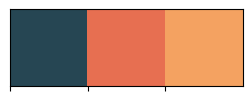

In [5]:
# Configurações de Layout, Matlab e Seaborn
LAYOUT_PALETTE = ["#264653","#e76f51","#f4a261"]
sns.set_palette(sns.color_palette(LAYOUT_PALETTE))

cm = sns.light_palette("#e76f51")

sns.palplot(sns.color_palette(LAYOUT_PALETTE))

In [6]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 25)

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Data Loading</p></div>

In [7]:
data_train_raw = pd.read_csv('/kaggle/input/instyle-nps/train.csv')
data_test_raw = pd.read_csv('/kaggle/input/instyle-nps/test.csv')

In [8]:
data_train_raw.shape, data_test_raw.shape

((103904, 24), (25976, 23))

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Data Preprocessing</p></div>

In [9]:
df = data_train_raw.copy()
teste = data_test_raw.copy()

In [10]:
def PREPROCESSING(df,verbose=True):
    
    if verbose ==True: 
        print('NaN Antes: ', df.isna().sum().sum())

        #df = df.dropna(axis=0)
        #df['Delivery delay in minutes'] = df['Delivery delay in minutes'].fillna(df['Delivery delay in minutes'].mode()[0])
        #df['Delivery delay in minutes'] = df['Delivery delay in minutes'].fillna(df['Delivery delay in minutes'].median())
        # KNN Imputer
        df['Delivery delay in minutes'] = df['Delivery delay in minutes'].fillna(df['Carrier delay in minutes'])
     
        print('NaN Depois: ', df.isna().sum().sum())

        #Features criadas: Delay
        
    return df

In [11]:
## Aplicando as alterações na base de treino
df = PREPROCESSING(df)

NaN Antes:  310
NaN Depois:  0


In [12]:
## Aplicando as alterações na base de teste
teste = PREPROCESSING(teste)

NaN Antes:  83
NaN Depois:  0


## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Exploratory Data Analysis</p></div> 

In [13]:
df_eda = df.copy()

In [14]:
def summary_stats(df):
    # central tendency: mean, median   
    numerical_features = df.select_dtypes(include = ['number']).columns.values
    df = df[numerical_features]
    
    count_ = pd.DataFrame(df.apply(np.size))
    sum_ = pd.DataFrame(df.apply(np.sum))
    mean_ = pd.DataFrame(df.apply(np.mean))
    std_ = pd.DataFrame(df.apply(np.std))
    median_ = pd.DataFrame(df.apply(np.median))
    
    min_ = pd.DataFrame(df.apply(min))
    max_ = pd.DataFrame(df.apply(max))
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    q1_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,25)))
    q3_ = pd.DataFrame(df.apply(lambda x: np.percentile(x,75)))
    
    skewness_= pd.DataFrame(df.apply(lambda x: x.skew()))
    kurtosis_ = pd.DataFrame(df.apply(lambda x: x.kurtosis()))
    
    summary = pd.concat([count_, mean_, std_, median_, sum_, min_, max_, range_, q1_,q3_, skewness_, kurtosis_],axis=1)
    summary.columns = ['counts', 'mean','std','median','sum','min','max', 'range', '25%','75%', 'skew', 'kurt']
 

    cm = sns.light_palette("#e76f51", as_cmap = True)
    
    display(summary.style.format('{:.2f}').background_gradient(subset=(summary.index[2:],summary.columns[:]),cmap=cm))

In [15]:
summary_stats(df)

,counts,mean,std,median,sum,min,max,range,25%,75%,skew,kurt
id,103904.00,64924.21,37463.63,64856.50,6745885168.00,1.00,129880.00,129879.00,32533.75,97368.25,0.00,-1.20
Age,103904.00,39.38,15.11,40.00,4091709.00,7.00,85.00,78.00,27.00,51.00,-0.00,-0.72
Store distance,103904.00,1189.45,997.14,843.00,123588444.00,31.00,4983.00,4952.00,414.00,1743.00,1.11,0.27
InStore wifi,103904.00,2.73,1.33,3.00,283625.00,0.00,5.00,5.00,2.00,4.00,0.04,-0.85
Open/Close time convenient,103904.00,3.06,1.53,3.00,317977.00,0.00,5.00,5.00,2.00,4.00,-0.33,-1.04
Easy of online shopping,103904.00,2.76,1.40,3.00,286453.00,0.00,5.00,5.00,2.00,4.00,-0.02,-0.91
Store location,103904.00,2.98,1.28,3.00,309310.00,0.00,5.00,5.00,2.00,4.00,-0.06,-1.03
Toilet cleaning,103904.00,3.20,1.33,3.00,332714.00,0.00,5.00,5.00,2.00,4.00,-0.15,-1.15
Dressing room,103904.00,3.25,1.35,3.00,337727.00,0.00,5.00,5.00,2.00,4.00,-0.45,-0.70
Waiting room,103904.00,3.44,1.32,4.00,357367.00,0.00,5.00,5.00,2.00,5.00,-0.48,-0.93


## <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Algumas das analises realizadas...</p></div> 

Clientes Satisfeitos: 45025
Clientes Neutros/Insatisfeitos: 58879


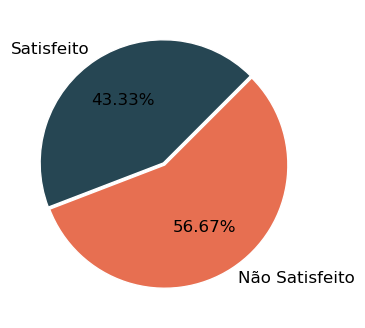

In [16]:
plt.figure(figsize=(4, 4))
plt.pie([len(df_eda.loc[df_eda['Satisfaction'] == 'Satisfied']), 
         len(df_eda.loc[df_eda['Satisfaction'] == 'Neutral or Dissatisfaction'])],
        labels=['Satisfeito', 'Não Satisfeito'],
        colors=['#264653', '#e76f51'],
        explode=(0.01, 0.01),
        startangle=45,
        autopct='%.2f%%',
        wedgeprops={'linewidth': 1, 'edgecolor': "white"},
        textprops={'fontsize': 12});

print(f"Clientes Satisfeitos: {df_eda['Satisfaction'].value_counts()[1]}")
print(f"Clientes Neutros/Insatisfeitos: {df_eda['Satisfaction'].value_counts()[0]}")

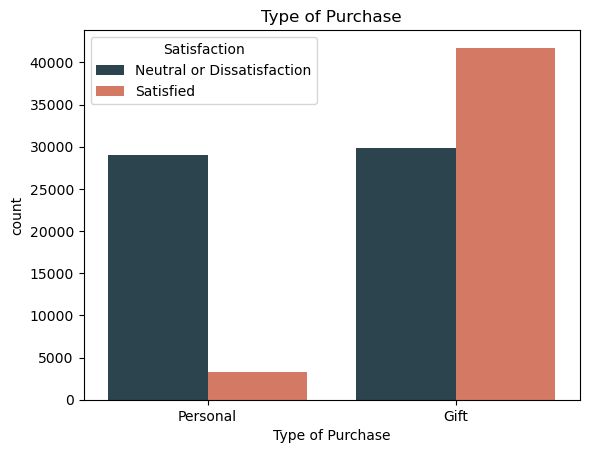

In [17]:
sns.countplot(data=df_eda, x="Type of Purchase", hue="Satisfaction",  palette=LAYOUT_PALETTE)
plt.title("Type of Purchase");

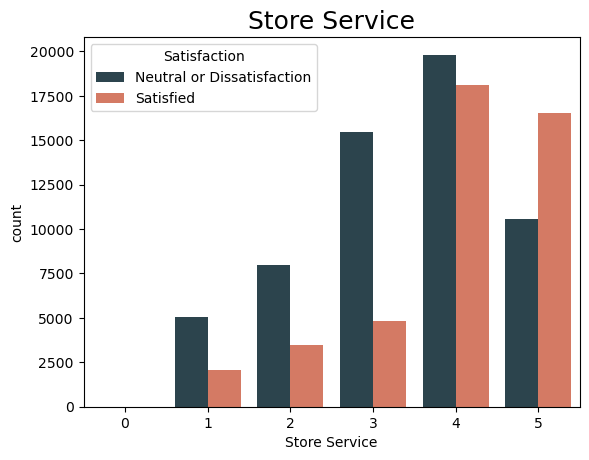

In [18]:
sns.countplot(data=df_eda, x="Store Service", hue='Satisfaction', palette=LAYOUT_PALETTE)
plt.title("Store Service",fontsize=18);

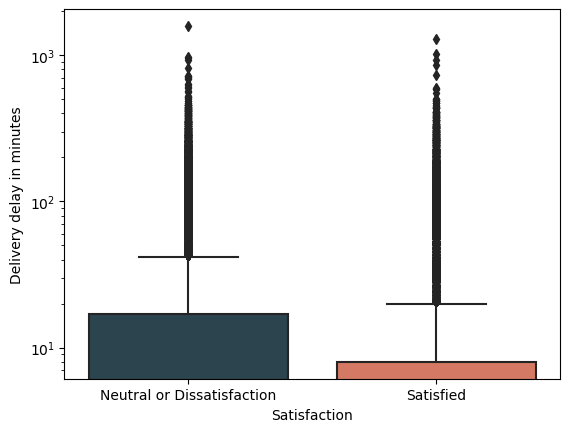

In [19]:
sns.boxplot(data=df, x='Satisfaction', y='Delivery delay in minutes', palette=LAYOUT_PALETTE)
plt.yscale('log')

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Data Preparation</p></div> 

In [20]:
df_prep = df.copy()

In [21]:
def ENCODING(df, is_train=True):

    gender_dict = {'Male': 0,  'Female':1}
    df['Gender'] = df['Gender'].map(gender_dict)

    customer_dict = {'disloyal Customer': 0,  'Loyal Customer':1}
    df['Customer Type'] = df['Customer Type'].map(customer_dict)

    gift_dict = {'Gift': 0,  'Personal':1}
    df['Type of Purchase'] = df['Type of Purchase'].map(gift_dict)

    size_dict = {'Small': 1, 'Medium':2, 'Large':3}
    df['Store size'] = df['Store size'].map(size_dict)        
                     
    if is_train == True:
        satisfaction_dict = {'Neutral or Dissatisfaction': 0,  'Satisfied':1}
        df['Satisfaction'] = df['Satisfaction'].map(satisfaction_dict)

    return df

In [22]:
def RESCALE(df):
    rs = RobustScaler()
    mms = MinMaxScaler()
    pt = PowerTransformer()
    
    df['Carrier delay in minutes'] = rs.fit_transform( df[['Carrier delay in minutes']].values)
    df['Delivery delay in minutes'] = rs.fit_transform( df[['Delivery delay in minutes']].values)
    df['Store location'] = mms.fit_transform( df[['Store location']].values)
    df['Age'] = mms.fit_transform( df[['Age']].values)
    
    return df

In [23]:
TARGET = 'Satisfaction'

In [24]:
df_prep = ENCODING(df_prep, is_train=True)
df_prep = RESCALE(df_prep)

In [25]:
teste = ENCODING(teste, is_train=False)
teste = RESCALE(teste)

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Feature Selection</p></div> 

In [26]:
SELECTED_FEATURES = ['id', 
                     'Gender', 
                     'Customer Type', 
                     'Age', 
                     'Type of Purchase',
                     'Store size', 
                     'Store distance', 
                     'InStore wifi',
                     'Open/Close time convenient', 
                     'Easy of online shopping',
                     'Store location', 
                     'Toilet cleaning', 
                     'Dressing room', 
                     'Waiting room',
                     'Kids entertainment', 
                     'Seller service', 
                     'Showroom ', 
                     'Self-Store',
                     'Purchase service', 
                     'Store Service', 
                     'Cleanliness',
                     'Carrier delay in minutes', 
                     'Delivery delay in minutes',
                    ]

In [27]:
y = df_prep[TARGET]
X = df_prep[SELECTED_FEATURES]

In [28]:
X_test = teste[SELECTED_FEATURES]

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Models</p></div> 

- Lightgbm
- XGBoost
- Random Forest
- Voting Classifier

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify=y, shuffle=True, random_state=RANDOM_SEED)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((83123, 23), (83123,), (20781, 23), (20781,))

In [30]:
def CM(y, y_pred):
    labels = ["Não Satisfeito / Neutral", "Satisfeito"]
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format="d")  
    plt.show()
    print("Score: \n", classification_report(y,y_pred))   

In [31]:
def CVS(model, X, y):
   
    number_folds = 5    
    Kfold = StratifiedKFold(n_splits=number_folds, shuffle=True, random_state=RANDOM_SEED )
    
    y_prob = cross_val_predict(model, X, y, cv=Kfold, method='predict_proba', verbose=False)    
    y_prob = y_prob[:,1]    
    threshold = 0.5    
    y_pred = np.where(y_prob >= threshold, 1, 0)
    
    CM(y,y_pred)

    scores = cross_validate(model, X, y, cv = Kfold, scoring=['accuracy','precision','recall','f1','roc_auc'], return_train_score=True)
    
    df = pd.DataFrame.from_dict(scores).T
    df['value'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    display(df[['value','std']])    
    
    return y_prob, y_pred

In [32]:
weight = round(float((y.value_counts()[0])/(y.value_counts()[1])),3) #sum_neg/sum_p
weight

1.308

In [33]:
results = df_prep[['Satisfaction']].copy()

## <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">LightGBM</p></div> 

## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">LightGBM - Hypertunning</p></div> 

In [34]:
def objective(trial):    
   
    param_grid = {
        'objective': trial.suggest_categorical('objective', ['binary']),
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt','dart']), 
        'num_leaves': trial.suggest_int('num_leaves', 60, 120, step=5),
        'max_depth': trial.suggest_int('max_depth', 9, 21),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.3), 
        #'learning_rate': trial.suggest_categorical('learning_rate', [0.25]),
        #'max_bin': trial.suggest_int('max_bin', 50, 250, step=10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1e-1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-6, 1e-4, log=True),
        #'min_child_samples': trial.suggest_int('min_child_samples', 1, 8, 1),
        #'num_iterations': trial.suggest_int('num_iterations', 100, 200, step=10),
        #'scale_pos_weight': trial.suggest_categorical('scale_pos_weight', [1, weight]),
        #'boost_from_average': trial.suggest_categorical('boost_from_average', [False, True]),
        'seed': trial.suggest_categorical('seed', [RANDOM_SEED])        
        
    }
    
    model = LGBMClassifier(**param_grid)
    
    number_folds = 3
    kfold = StratifiedKFold(n_splits=number_folds, shuffle=True)
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    
    return f1_score(y, y_pred)

In [35]:
study = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=120)
 
trial = study.best_trial

[I 2023-07-21 01:14:08,079] A new study created in memory with name: no-name-3010c336-4823-4b86-986e-73abc3702e70


In [36]:
# Print the result
lgbm_best_params = study.best_params
lgbm_best_score = study.best_value
print(f"Best score: {lgbm_best_score}\n")
print(f"Optimized parameters: {lgbm_best_params}\n")

Best score: 0.9611528963363065

Optimized parameters: {'objective': 'binary', 'boosting_type': 'dart', 'num_leaves': 65, 'max_depth': 17, 'learning_rate': 0.2864006212129696, 'reg_alpha': 0.035196978868993874, 'reg_lambda': 2.114167815164019e-05, 'seed': 42}



In [37]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [38]:
fig = optuna.visualization.plot_slice(study, params=["learning_rate", "max_depth", "num_leaves"])#, "reg_alpha", "reg_lambda"])
fig.show()

In [39]:
def plot_lgbm_param_scores(param_name, param_range, fixed_params, X_train, y_train, X_val, y_val):
    
    train_scores = []
    val_scores = []
    
    for param_value in param_range:
        params = fixed_params
        params[param_name] = param_value
        
        lgbm = LGBMClassifier(**params)
        lgbm.fit(X_train, y_train)
        
        train_scores.append(precision_score(y_train, lgbm.predict(X_train)))
        val_scores.append(precision_score(y_val, lgbm.predict(X_val)))
    
    plt.figure(figsize=(8, 4))
    plt.plot(param_range, train_scores, label="Train", color="#264653")
    plt.plot(param_range, val_scores, label="Val", color="#e76f51")

    plt.title("LightGBM")
    plt.xlabel(param_name)
    plt.ylabel("Precision")
    plt.tight_layout()
    plt.legend(loc="best");

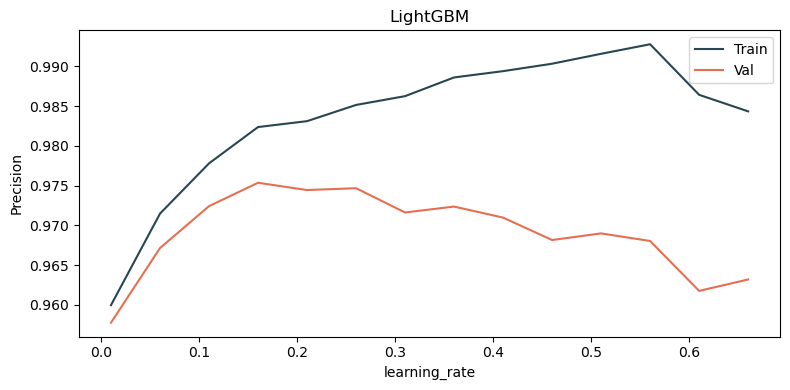

In [40]:
param_name = "learning_rate"
param_range = np.arange(0.01, 0.7, 0.05)
fixed_params = lgbm_best_params.copy()

plot_lgbm_param_scores(param_name, param_range, fixed_params, X_train, y_train, X_val, y_val)

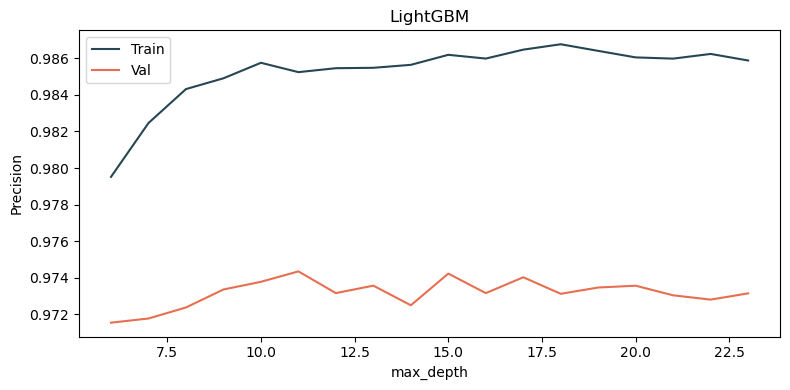

In [41]:
param_name = "max_depth"
param_range = np.arange(6, 24, 1)
fixed_params = lgbm_best_params.copy()

plot_lgbm_param_scores(param_name, param_range, fixed_params, X_train, y_train, X_val, y_val)

In [42]:
lgbm_best_params

{'objective': 'binary',
 'boosting_type': 'dart',
 'num_leaves': 65,
 'max_depth': 17,
 'learning_rate': 0.2864006212129696,
 'reg_alpha': 0.035196978868993874,
 'reg_lambda': 2.114167815164019e-05,
 'seed': 42}

In [43]:
lgbm_best_params_revised = {'objective': 'binary',
 'boosting_type': 'dart',
 'num_leaves': 65,
 'max_depth': 16,
 'learning_rate': 0.27,
 'reg_alpha': 0.0042,
 'reg_lambda': 1.3e-06,
 'seed': 42}

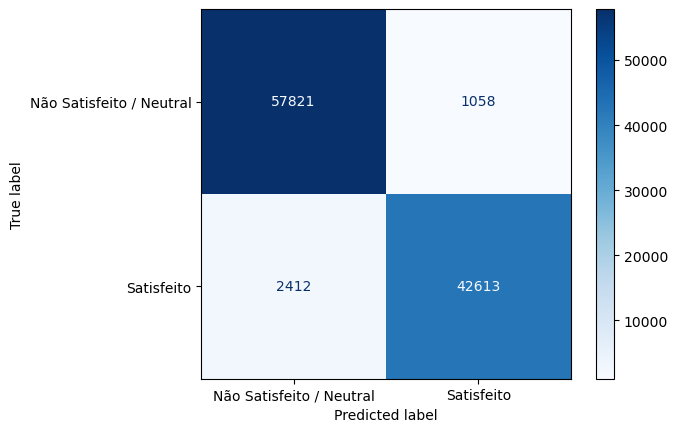

Score: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58879
           1       0.98      0.95      0.96     45025

    accuracy                           0.97    103904
   macro avg       0.97      0.96      0.97    103904
weighted avg       0.97      0.97      0.97    103904



,value,std
fit_time,4.324847,0.420853
score_time,0.161142,0.003286
test_accuracy,0.966604,0.000978
train_accuracy,0.975841,0.000417
test_precision,0.975774,0.001138
train_precision,0.985542,0.000470
test_recall,0.946430,0.001328
train_recall,0.958306,0.000604
test_f1,0.960877,0.001150
train_f1,0.971733,0.000490


In [44]:
lgbm_model = LGBMClassifier(**lgbm_best_params_revised)
lgbm_model.fit(X,y)
lgbm_prob, lgbm_pred = CVS(lgbm_model,X,y)

In [45]:
results['lgbm_pred'] = lgbm_pred
results['lgbm_prob'] = lgbm_prob
results.sample(5)

,Satisfaction,lgbm_pred,lgbm_prob
101509,0,0,0.000727
56315,1,1,0.988527
32611,1,1,0.998919
88407,1,1,0.999634
57558,0,0,0.000915


## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">LightGBM - Teste</p></div> 

In [46]:
lgbm_model.fit(X, y)
y_test_lgbm = lgbm_model.predict(X_test)
y_test_lgbm

array([1, 1, 0, ..., 0, 1, 0])

In [47]:
teste['Satisfaction'] = y_test_lgbm

In [48]:
len(teste), len(data_test_raw)

(25976, 25976)

In [49]:
teste['Satisfaction'].value_counts()

0    14882
1    11094
Name: Satisfaction, dtype: int64

In [50]:
#teste[['id','Satisfaction']].to_csv("submission_lgbm.csv", index=False)

## <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">XGBoost</p></div> 

## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">XGBoost - Hypertunning</p></div> 

In [51]:
def objective(trial): 
    
    param_grid = {
        'objective': trial.suggest_categorical('objective', ['binary:logistic']),  
        'booster': trial.suggest_categorical('booster', ['gbtree','dart']),
        'eval_metric': trial.suggest_categorical('eval_metric', ['auc']),    
        'max_depth': trial.suggest_int('max_depth', 6, 12),
        #'learning_rate': trial.suggest_categorical('learning_rate', [0.1]),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.25),
        'n_estimators' : trial.suggest_int('n_estimators', 60, 240, step=20),
        'alpha': trial.suggest_float('alpha', 1e-4, 1e-1, log=True),
        'lambda': trial.suggest_float('lambda', 1e-4, 1e-1, log=True),
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 6),  
        #'scale_pos_weight': trial.suggest_categorical('scale_pos_weight', [1,weight]),
        'seed': trial.suggest_categorical('seed', [RANDOM_SEED]),     
    }

    model = XGBClassifier(**param_grid)
    number_folds = 3
    Kfold = StratifiedKFold(n_splits=number_folds, shuffle=False) #random_state=RANDOM_SEED
    y_pred = cross_val_predict(model, X, y, cv=Kfold)
    
    return f1_score(y,y_pred)

In [52]:
study = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=5) 

trial = study.best_trial

In [53]:
# Print the result
xgb_best_params = study.best_params
xgb_best_score = study.best_value
print(f"Best score: {xgb_best_score}\n")
print(f"Optimized parameters: {xgb_best_params}\n")

Best score: 0.9587808581229263

Optimized parameters: {'objective': 'binary:logistic', 'booster': 'dart', 'eval_metric': 'auc', 'max_depth': 9, 'learning_rate': 0.20419376403847173, 'n_estimators': 80, 'alpha': 0.00031412866222331687, 'lambda': 0.0030926936142062593, 'seed': 42}



In [54]:
xgb_best_params

{'objective': 'binary:logistic',
 'booster': 'dart',
 'eval_metric': 'auc',
 'max_depth': 9,
 'learning_rate': 0.20419376403847173,
 'n_estimators': 80,
 'alpha': 0.00031412866222331687,
 'lambda': 0.0030926936142062593,
 'seed': 42}

In [55]:
xgb_best_params_revised = {'objective': 'binary:logistic',
 'booster': 'gbtree',
 'eval_metric': 'auc',
 'max_depth': 11,
 'learning_rate': 0.12,
 'n_estimators': 180,
 'alpha': 0.0144,
 'lambda': 0.0022,
 'seed': 42}

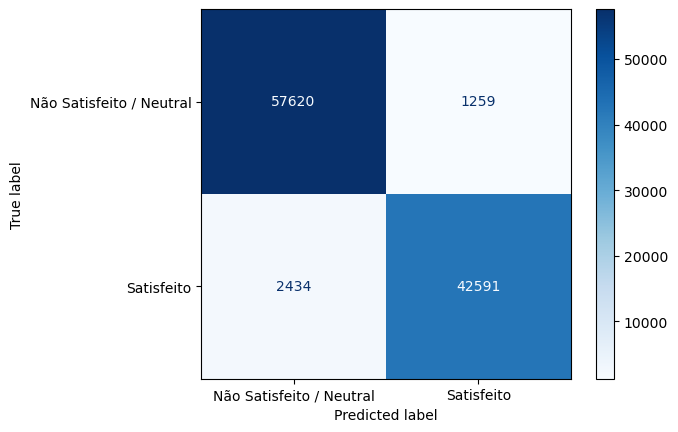

Score: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58879
           1       0.97      0.95      0.96     45025

    accuracy                           0.96    103904
   macro avg       0.97      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904



,value,std
fit_time,59.548412,2.956900e-01
score_time,0.510979,6.748010e-03
test_accuracy,0.964458,9.673832e-04
train_accuracy,0.999808,8.088155e-05
test_precision,0.971290,1.107687e-03
train_precision,0.999889,3.043367e-05
test_recall,0.945941,2.167484e-03
train_recall,0.999667,1.580261e-04
test_f1,0.958446,1.163563e-03
train_f1,0.999778,9.334918e-05


In [56]:
xgb_model = XGBClassifier(**xgb_best_params_revised)
xgb_prob, xgb_pred = CVS(xgb_model,X,y)

In [57]:
results['xgb_pred'] = xgb_pred
results['xgb_prob'] = xgb_prob
results.sample(5)

,Satisfaction,lgbm_pred,lgbm_prob,xgb_pred,xgb_prob
66138,1,1,0.996840,1,0.999963
33755,1,1,0.990159,1,0.999796
41674,1,1,0.999171,1,0.999967
72086,0,0,0.000180,0,0.000015
84690,1,1,0.636074,1,0.828080


## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">XGBoost - Teste</p></div> 

In [58]:
xgb_model.fit(X, y)
y_test_xgb = xgb_model.predict(X_test)
y_test_xgb

array([1, 1, 0, ..., 0, 1, 0])

In [59]:
teste['Satisfaction'] = y_test_xgb

In [60]:
len(teste), len(data_test_raw)

(25976, 25976)

In [61]:
teste['Satisfaction'].value_counts()

0    14845
1    11131
Name: Satisfaction, dtype: int64

In [62]:
#teste[['id','Satisfaction']].to_csv("submission_xgb.csv", index=False)

## <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Random Forest</p></div>

## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Random Forest - Hypertunning</p></div> 

In [63]:
def objective(trial): 
    
    param_grid = {
    'criterion': trial.suggest_categorical('criterion', ['gini','entropy']),      
    'n_estimators': trial.suggest_int('n_estimators', 60, 180, step=20),
    'max_depth': trial.suggest_int('max_depth', 8, 18),
    'min_samples_split': trial.suggest_int('min_samples_split', 3, 10),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 3),
    #'max_features': trial.suggest_float('max_features', 0.4, 0.6),
    'random_state': RANDOM_SEED,
}

    model = RandomForestClassifier(**param_grid)

    number_folds = 3
    Kfold = StratifiedKFold(n_splits=number_folds, shuffle=False)
    y_pred = cross_val_predict(model, X, y, cv=Kfold)
    
    return f1_score(y,y_pred)

In [64]:
study = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=4);

trial = study.best_trial

In [65]:
# Print the result
rf_best_params = study.best_params
rf_best_score = study.best_value
print(f"Best score: {rf_best_score}\n")
print(f"Optimized parameters: {rf_best_params}\n")

Best score: 0.9538607466293277

Optimized parameters: {'criterion': 'entropy', 'n_estimators': 140, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 2}



In [66]:
rf_best_params

{'criterion': 'entropy',
 'n_estimators': 140,
 'max_depth': 16,
 'min_samples_split': 5,
 'min_samples_leaf': 2}

In [67]:
rf_best_params_revised = {'criterion': 'entropy',
 'n_estimators': 100,
 'max_depth': 17,
 'min_samples_split': 5,
 'min_samples_leaf': 1}

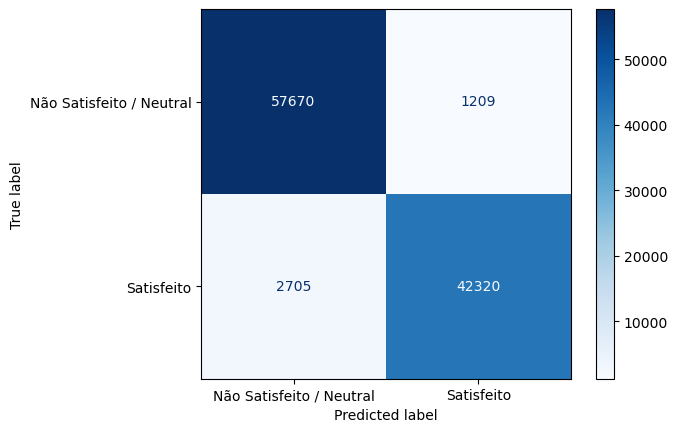

Score: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58879
           1       0.97      0.94      0.96     45025

    accuracy                           0.96    103904
   macro avg       0.96      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904



,value,std
fit_time,14.401450,0.286375
score_time,0.750293,0.011657
test_accuracy,0.961782,0.001244
train_accuracy,0.982770,0.000406
test_precision,0.971734,0.001067
train_precision,0.990950,0.000498
test_recall,0.939123,0.002549
train_recall,0.969089,0.000583
test_f1,0.955148,0.001502
train_f1,0.979898,0.000475


In [68]:
rf_model = RandomForestClassifier(**rf_best_params_revised)
rf_model.fit(X,y)
rf_prob, rf_pred = CVS(rf_model,X,y)

In [69]:
results['rf_pred'] = rf_pred
results['rf_prob'] = rf_prob
results.sample(5)

,Satisfaction,lgbm_pred,lgbm_prob,xgb_pred,xgb_prob,rf_pred,rf_prob
98477,1,1,0.998765,1,0.999829,1,0.999894
88846,1,1,0.999685,1,0.999993,1,0.999982
94804,1,1,0.998527,1,0.999901,1,0.947500
101683,0,0,0.011841,0,0.001176,0,0.047195
2178,0,0,0.000635,0,0.000027,0,0.000000


## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Random Forest - Teste</p></div> 

In [70]:
rf_model.fit(X, y)
y_test_rf = rf_model.predict(X_test)
y_test_rf

array([1, 1, 0, ..., 0, 1, 0])

In [71]:
teste['Satisfaction'] = y_test_rf 

In [72]:
len(teste), len(data_test_raw)

(25976, 25976)

In [73]:
teste['Satisfaction'].value_counts()

0    14877
1    11099
Name: Satisfaction, dtype: int64

In [74]:
#teste[['id','Satisfaction']].to_csv("submission_rf.csv", index=False)

## <div style="color:white;display:fill;border-radius:5px;background-color:#e76f51;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Voting Classifier</p></div>

In [75]:
voting = VotingClassifier(estimators=[('LightGBM', lgbm_model), 
                                      ('XGBoost', xgb_model),
                                      ('RandomForest', rf_model)],                          
                                      voting='soft')

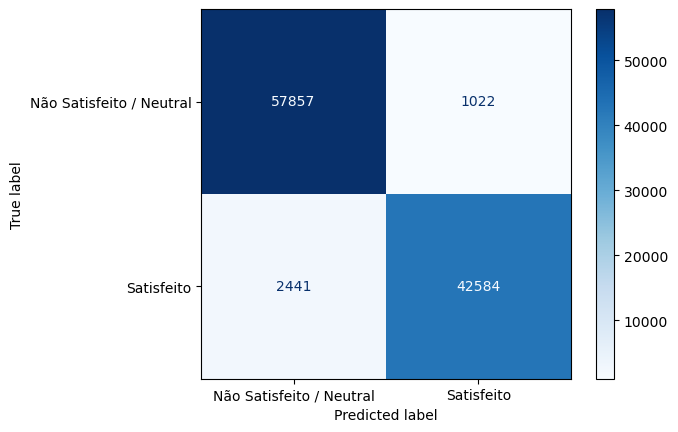

Score: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58879
           1       0.98      0.95      0.96     45025

    accuracy                           0.97    103904
   macro avg       0.97      0.96      0.97    103904
weighted avg       0.97      0.97      0.97    103904



,value,std
fit_time,78.159186,0.528068
score_time,1.343873,0.019577
test_accuracy,0.966662,0.000641
train_accuracy,0.992998,0.000445
test_precision,0.976542,0.000791
train_precision,0.997077,0.000220
test_recall,0.945786,0.001821
train_recall,0.986735,0.000908
test_f1,0.960916,0.000787
train_f1,0.991879,0.000519


In [76]:
voting.fit(X,y)
voting_prob, voting_pred = CVS(voting,X,y)

In [77]:
results['voting_pred'] = voting_pred
results['voting_prob'] = voting_prob
results.sample(5)

,Satisfaction,lgbm_pred,lgbm_prob,xgb_pred,xgb_prob,rf_pred,rf_prob,voting_pred,voting_prob
14238,1,1,0.995919,1,0.999819,1,0.996509,1,0.997616
23964,0,0,0.016501,0,0.000563,0,0.032149,0,0.020928
21010,0,0,0.000530,0,0.000114,0,0.000217,0,0.001048
3625,1,1,0.988692,1,0.999366,1,0.961943,1,0.983023
64133,0,0,0.000284,0,0.000026,0,0.000300,0,0.000127


## <div style="color:white;display:fill;border-radius:5px;background-color:#f4a261;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">VotingClassifier - Teste</p></div> 

In [78]:
voting.fit(X, y)
y_test_voting = voting.predict(X_test)
y_test_voting

array([1, 1, 0, ..., 0, 1, 0])

In [79]:
teste['Satisfaction'] = y_test_voting

In [80]:
len(teste), len(data_test_raw)

(25976, 25976)

In [81]:
teste['Satisfaction'].value_counts()

0    14884
1    11092
Name: Satisfaction, dtype: int64

In [82]:
#teste[['id','Satisfaction']].to_csv("submission_voting.csv", index=False)

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Feature Importance</p></div> 

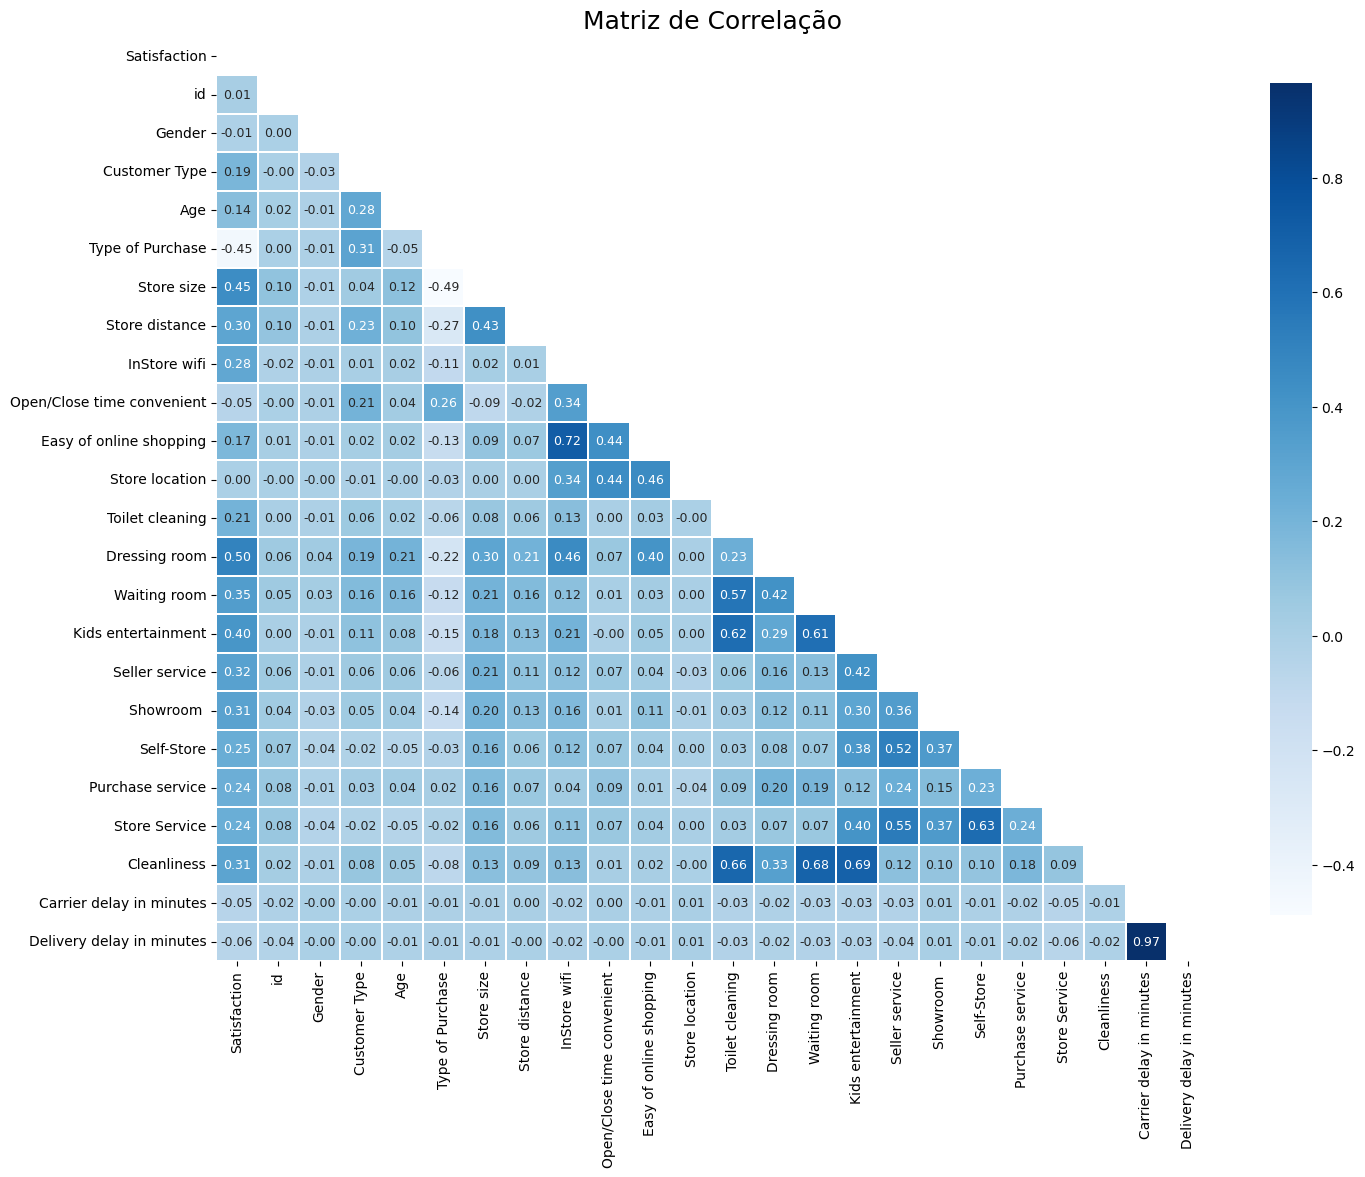

In [83]:
aux = pd.concat([y,X], axis=1)

mask = np.zeros_like(aux.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Matriz de Correlação',fontsize=18)
sns.heatmap(aux.corr(),linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

In [84]:
lgbm_model.fit(X, y)
explainer = shap.Explainer(lgbm_model, X)
shap_values = explainer(X)

100%|===================| 103845/103904 [17:06<00:00]       

In [85]:
shap.initjs()

In [86]:
#idx = 196 Satisfeito
#idx = 197 Não Satisfeito
idx = 197

In [87]:
df.iloc[idx,:]

id                                                 56446
Gender                                            Female
Customer Type                             Loyal Customer
Age                                                   52
Type of Purchase                                Personal
Store size                                        Medium
Store distance                                       719
InStore wifi                                           1
Open/Close time convenient                             5
Easy of online shopping                                2
Store location                                         2
Toilet cleaning                                        3
Dressing room                                          5
Waiting room                                           5
Kids entertainment                                     3
Seller service                                         3
Showroom                                               2
Self-Store                     

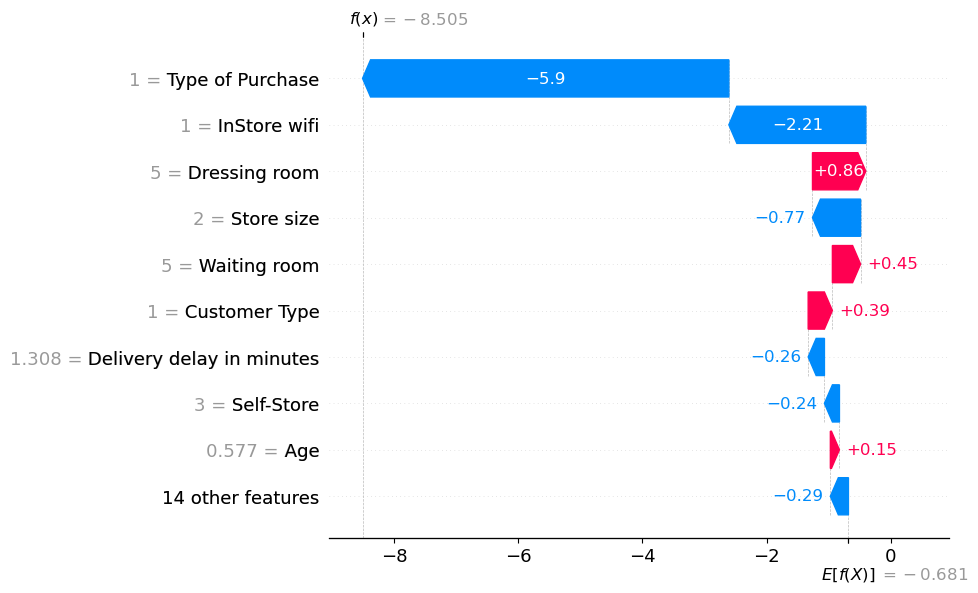

In [88]:
#Explicabilidade individual de acordo com idx
shap.plots.waterfall(shap_values[idx,:])

/opt/conda/lib/python3.10/site-packages/shap/plots/_beeswarm.py:375: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



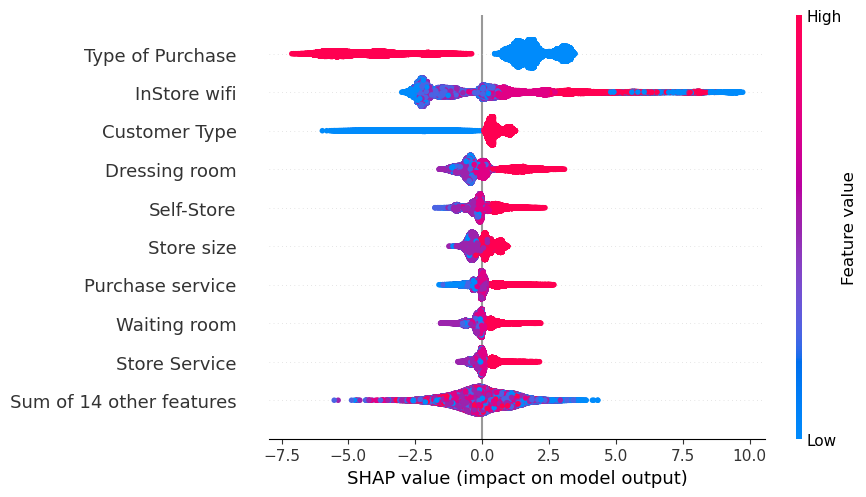

In [89]:
# Explicabilidade Geral, positivo/negativo
shap.plots.beeswarm(shap_values)

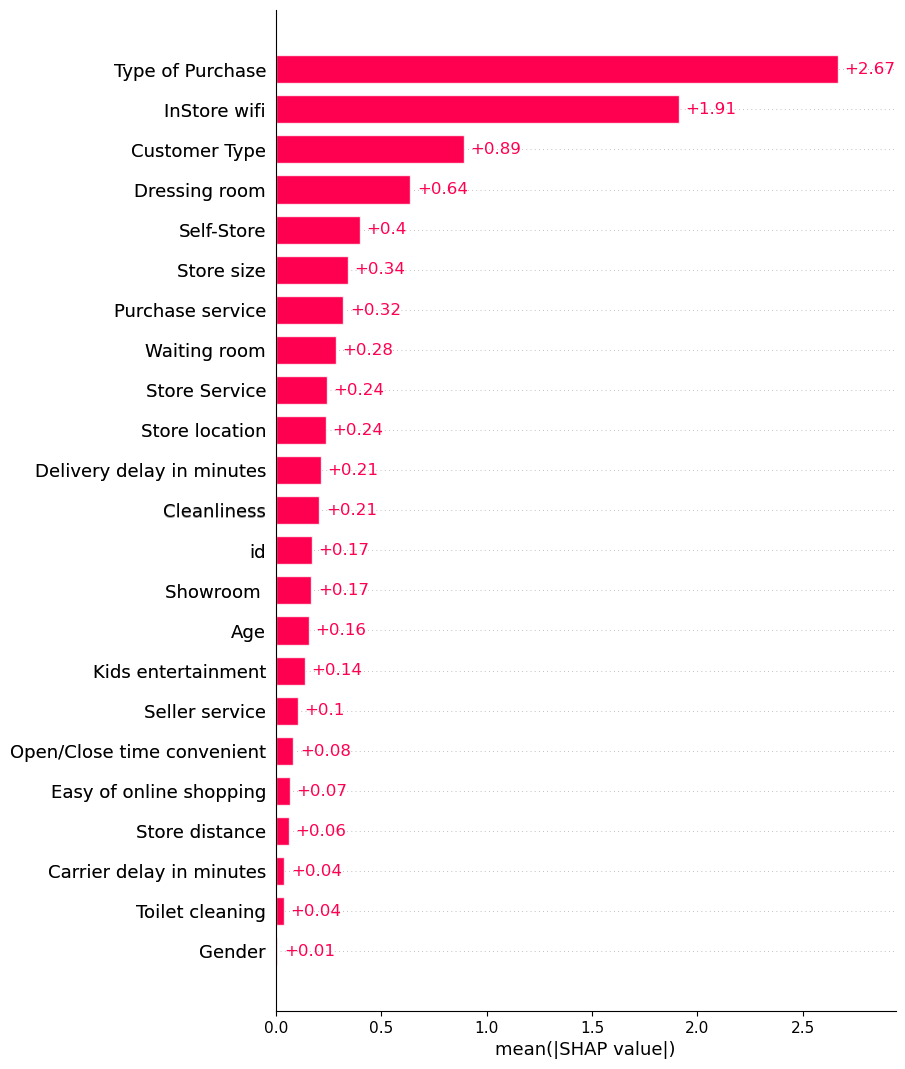

In [90]:
#Explicabilidade Geral, média
shap.plots.bar(shap_values, max_display=25)

## <div style="color:white;display:fill;border-radius:5px;background-color:#264653;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Considerações Finais</p></div>

- Considerando um cenário mais proximo do real, precisariamos de mais informações sobre do processo de aquisição de dados. Por exemplo, a quantidade real de instatisfeitos é realmente de 56,67%? como foi obtido os resultados parciais de satisfação? Se a base de dados disponibilizadas incluí informações de troca de produtos? entre outras duvidas...


- O modelo de machine learnining não é a etapa final do processo, o objetivo final é entender a insatisfação do e propor soluções.


### MELHOR CODIGO
**Melhor Estratégia:**

<u>Preprocessing:</u> 'Delivery delay in minutes' = 'Carrier delay in minutes' se NaN<br>
<u>Encoding:</u> Intuitivo<br>
<u>Transformação Logaritimica (Robust Scaler):</u> 'Delivery delay in minutes','Carrier delay in minutes' <br>
<u>LightGBM:</u> {'objective': 'binary',
 'boosting_type': 'dart',
 'num_leaves': 80,
 'max_depth': 15,
 'learning_rate': 0.1978445886831706,
 'reg_alpha': 0.01448840584544802,
 'reg_lambda': 0.006262263425279142,
 'boost_from_average': False,
 'seed': 42}
